In [47]:
import numpy as np
import komm

In [48]:
pxa = 3 / 10
pxb = 6 / 10
pxc = 1 / 10

In [49]:
arr = [pxa, pxb, pxc]

Hx = 0
for i in range(len(arr)):
    px = arr[i]
    Hx += -px * np.log2(px)

Hx

np.float64(1.295461844238322)

In [50]:
x2 = [i * j for i in arr for j in arr]

x2

[0.09, 0.18, 0.03, 0.18, 0.36, 0.06, 0.03, 0.06, 0.010000000000000002]

In [51]:
Hx2 = 0
for i in range(len(x2)):
    Hx2 += -x2[i] * np.log2(x2[i])

Hx2

np.float64(2.5909236884766433)

In [52]:
(
    0.36 * 2
    + 0.18 * 2
    + 0.18 * 3
    + 0.09 * 4
    + 0.06 * 4
    + 0.06 * 5
    + 0.03 * 6
    + 0.03 * 6
    + 0.01 * 6
)

2.94

### Alice no País das Maravilhas

In [53]:
with open("assets/pg11.txt") as f:
    text = f.read()

chars = set(text)
counts = {c: text.count(c) for c in chars}
probabilities = {c: counts[c] / len(text) for c in chars}

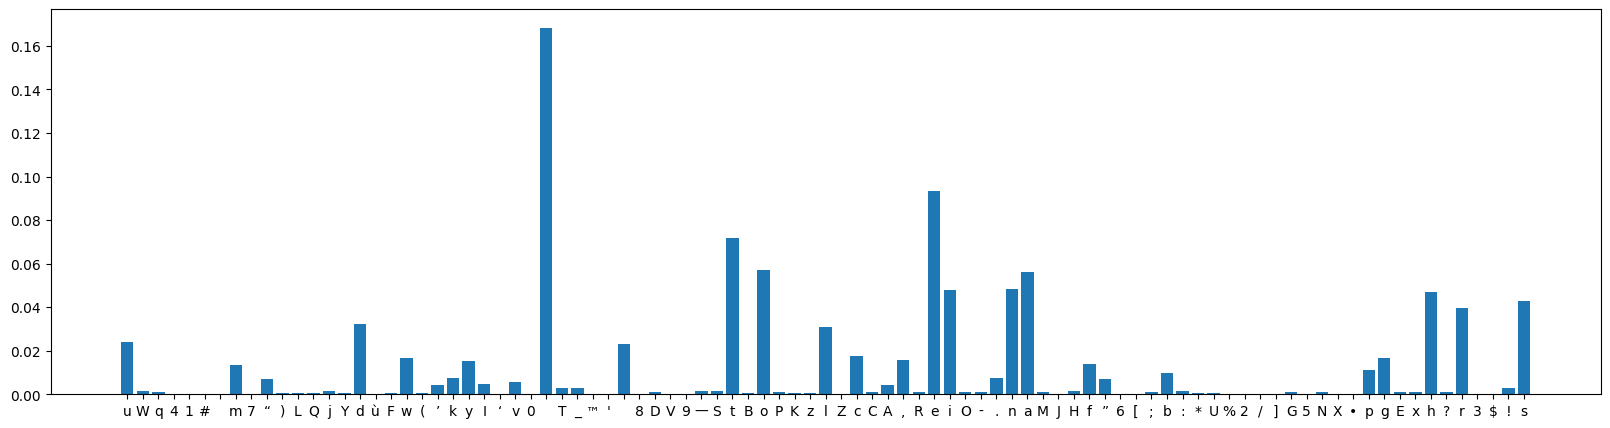

In [54]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 5))

plt.bar(range(len(probabilities)), list(probabilities.values()), align="center")
plt.xticks(range(len(probabilities)), list(probabilities.keys()))

plt.show()

In [55]:
pmf = sorted([counts[c] / len(text) for c in chars], reverse=True)
huff = komm.HuffmanCode(pmf)
indexes = {c: i for i, c in enumerate(chars)}
encoded_text = [indexes[c] for c in text]
huff_encoded = huff.encode(encoded_text)

padding = 8 - len(huff_encoded) % 8
if padding != 8:
    huff_encoded = np.concatenate((huff_encoded, np.zeros(padding, dtype=int)))

bytes_array = bytearray()
for i in range(0, len(huff_encoded), 8):
    byte = 0
    for j in range(8):
        byte = byte << 1
        byte = byte | huff_encoded[i + j]
    bytes_array.append(byte)

with open("encoded_text.bin", "wb") as file:
    # write padding
    file.write(bytes([padding]))
    file.write(bytes([len(chars)]))
    file.write(bytes_array)

In [56]:
with open("encoded_text.bin", "rb") as file:
    padding = int.from_bytes(file.read(1), byteorder="big")
    num_letters = int.from_bytes(file.read(1), byteorder="big")
    bytes_array = file.read()


huff_encoded = []
for byte in bytes_array:
    bits = bin(byte)[2:].zfill(8)  # Converter para binário e garantir 8 bits
    huff_encoded.extend(int(bit) for bit in bits)

if padding:
    huff_encoded = huff_encoded[:-padding]

huff_decoded = np.array(huff_encoded, dtype=int)
decoded_text = huff.decode(huff_decoded)
inv_indexes = {v: k for k, v in indexes.items()}
decoded_chars = [inv_indexes[c] for c in decoded_text]

with open("huff_decoded.txt", "w") as file:
    file.write("".join(decoded_chars))